In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pulp
import sys
import os
import importlib.util
import importlib
import gurobipy as gp

# モジュールを強制的に再ロード（古いキャッシュをクリア）
if 'code' in sys.modules:
    del sys.modules['code']
# サブモジュールも削除
for module_name in list(sys.modules.keys()):
    if module_name.startswith('code.'):
        del sys.modules[module_name]

current_dir = os.getcwd()
spec = importlib.util.spec_from_file_location("code", os.path.join(current_dir, "code", "__init__.py"))
code_module = importlib.util.module_from_spec(spec)
sys.modules["code"] = code_module
spec.loader.exec_module(code_module)

# サブモジュールも再ロード
importlib.reload(code_module)

make_tensor_grid_2d = code_module.make_tensor_grid_2d
make_tensor_grid_3d = code_module.make_tensor_grid_3d
product_beta_density = code_module.product_beta_density
solve_mechanism = code_module.solve_mechanism
solve_mechanism_iterative = code_module.solve_mechanism_iterative
solve_dual = code_module.solve_dual
discretize_signed_measure = code_module.discretize_signed_measure
build_cost_matrix = code_module.build_cost_matrix
classify_region = code_module.classify_region
plot_polyhedral_regions = code_module.plot_polyhedral_regions
save_results = code_module.save_results
load_results = code_module.load_results

print("モジュールを再ロードしました")

モジュールを再ロードしました


In [2]:
home_license = os.path.expanduser('~/gurobi.lic')
os.environ['GRB_LICENSE_FILE'] = home_license

SOLVER = pulp.GUROBI(msg=True)

# ケース1

In [3]:
# ケース1: 財a, 財b, シナジーはBeta(1,1)
NX, NY, NZ = 20, 20, 20
BETA_PARAMS = [
    (1.0, 1.0),
    (1.0, 1.0),
    (1.0, 1.0),
]

points, weights = make_tensor_grid_3d(NX, NY, NZ, BETA_PARAMS)
print(f"#types = {len(points)}")

#types = 8000


In [4]:
status, obj_val, u_sol, p_sol, n_iter = solve_mechanism_iterative(
    points, weights, grid_sizes=(NX, NY, NZ), solver=SOLVER
)

print("LP status:", status)
print("Optimal revenue:", obj_val)
print(f"Number of iterations: {n_iter}")

# 結果を保存
filepath_case1 = save_results(
    points, weights, u_sol, p_sol, obj_val, status,
    grid_sizes=(NX, NY, NZ),
    n_iter=n_iter,
    filename="results_case1.npz"
)


Set parameter WLSAccessID
Set parameter WLSSecret
Set parameter LicenseID to value 2749041
Academic license 2749041 - for non-commercial use only - registered to ko___@u.northwestern.edu
Gurobi Optimizer version 13.0.0 build v13.0.0rc1 (mac64[arm] - Darwin 25.1.0 25B78)

CPU model: Apple M2
Thread count: 8 physical cores, 8 logical processors, using up to 8 threads

Academic license 2749041 - for non-commercial use only - registered to ko___@u.northwestern.edu
Optimize a model with 69600 rows, 32000 columns and 192800 nonzeros (Max)
Model fingerprint: 0x88b5f3bb
Model has 32000 linear objective coefficients
Coefficient statistics:
  Matrix range     [5e-02, 1e+00]
  Objective range  [3e-06, 1e-04]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+00]
Presolve removed 7 rows and 0 columns
Presolve time: 0.25s
Presolved: 69593 rows, 32000 columns, 192835 nonzeros

Concurrent LP optimizer: primal simplex, dual simplex, and barrier
Showing barrier log only...

Ordering time: 

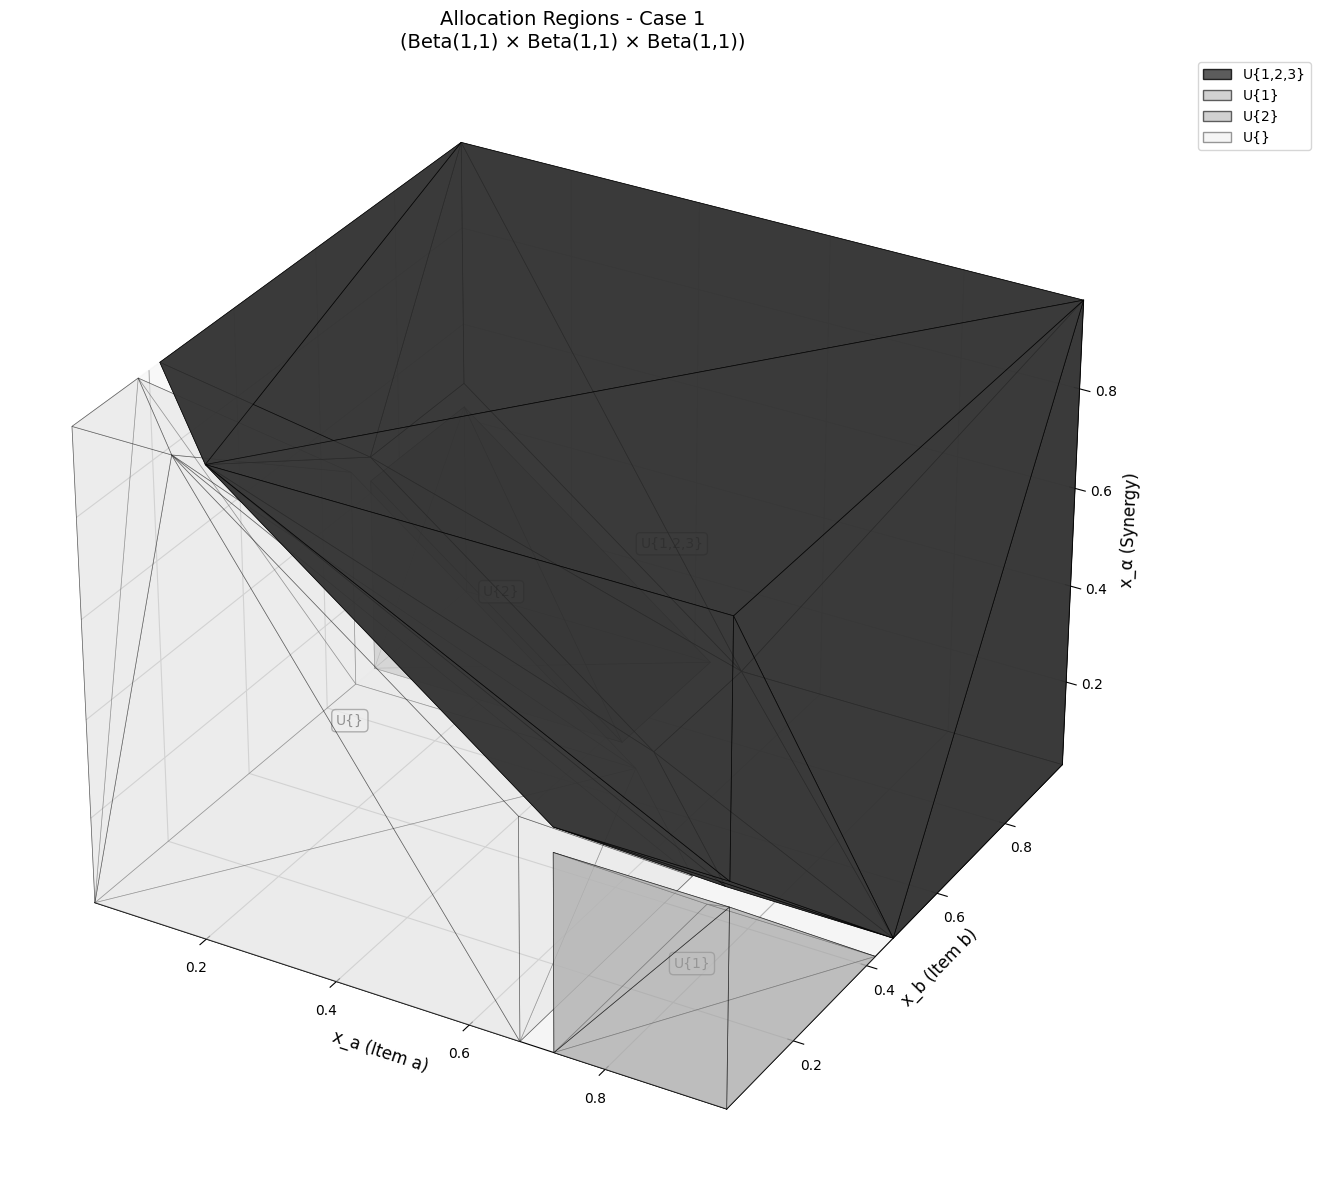

領域の統計:
  U{1,2,3}: 5500 点
  U{1}: 270 点
  U{2}: 270 点
  U{}: 1960 点


In [ ]:
# 保存されたデータから読み込んで可視化
data = load_results("data/results_case1.npz")
plot_polyhedral_regions(
    data['points'], data['p_sol'], data['p_sol'][2, :],
    title="Allocation Regions - Case 1 (from saved data)\n(Beta(1,1) × Beta(1,1) × Beta(1,1))"
)


# ケース2

In [7]:
# ケース2: 財a, 財bはBeta(1,1)、シナジーαはU[-1,0]
NX2, NY2, NZ2 = 20, 20, 20
BETA_PARAMS_MIXED = [
    {'type': 'beta', 'params': (1.0, 1.0), 'range': (0, 1)},
    {'type': 'beta', 'params': (1.0, 1.0), 'range': (0, 1)},
    {'type': 'uniform', 'range': (-1, 0)},
]

In [8]:
points2, weights2 = make_tensor_grid_3d(NX2, NY2, NZ2, BETA_PARAMS_MIXED)
print(f"#types = {len(points2)}")
print("ex. first point, weight =", points2[0], weights2[0])

status2, obj_val2, u_sol2, p_sol2, n_iter2 = solve_mechanism_iterative(
    points2, weights2, grid_sizes=(NX2, NY2, NZ2), solver=SOLVER
)

print("LP status:", status2)
print("Optimal revenue:", obj_val2)
print(f"Number of iterations: {n_iter2}")

# 結果を保存
filepath_case2 = save_results(
    points2, weights2, u_sol2, p_sol2, obj_val2, status2,
    grid_sizes=(NX2, NY2, NZ2),
    n_iter=n_iter2,
    filename="results_case2.npz"
)


#types = 8000
ex. first point, weight = (0.025, 0.025, -0.975) 0.000125
Gurobi Optimizer version 13.0.0 build v13.0.0rc1 (mac64[arm] - Darwin 25.1.0 25B78)

CPU model: Apple M2
Thread count: 8 physical cores, 8 logical processors, using up to 8 threads

Academic license 2749041 - for non-commercial use only - registered to ko___@u.northwestern.edu
Optimize a model with 139200 rows, 64000 columns and 385600 nonzeros (Max)
Model has 64000 linear objective coefficients
Coefficient statistics:
  Matrix range     [5e-02, 1e+00]
  Objective range  [3e-06, 1e-04]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+00]
LP warm-start: use basis

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    1.8911250e+00   8.760000e+03   0.000000e+00      0s
   23836    1.3587753e+00   4.502210e+04   0.000000e+00      5s
   26113    1.3481747e+00   6.187006e+04   0.000000e+00     10s
   27355    1.3447959e+00   2.667770e+03   0.000000e+00     15s
   28597    1.3418642e+

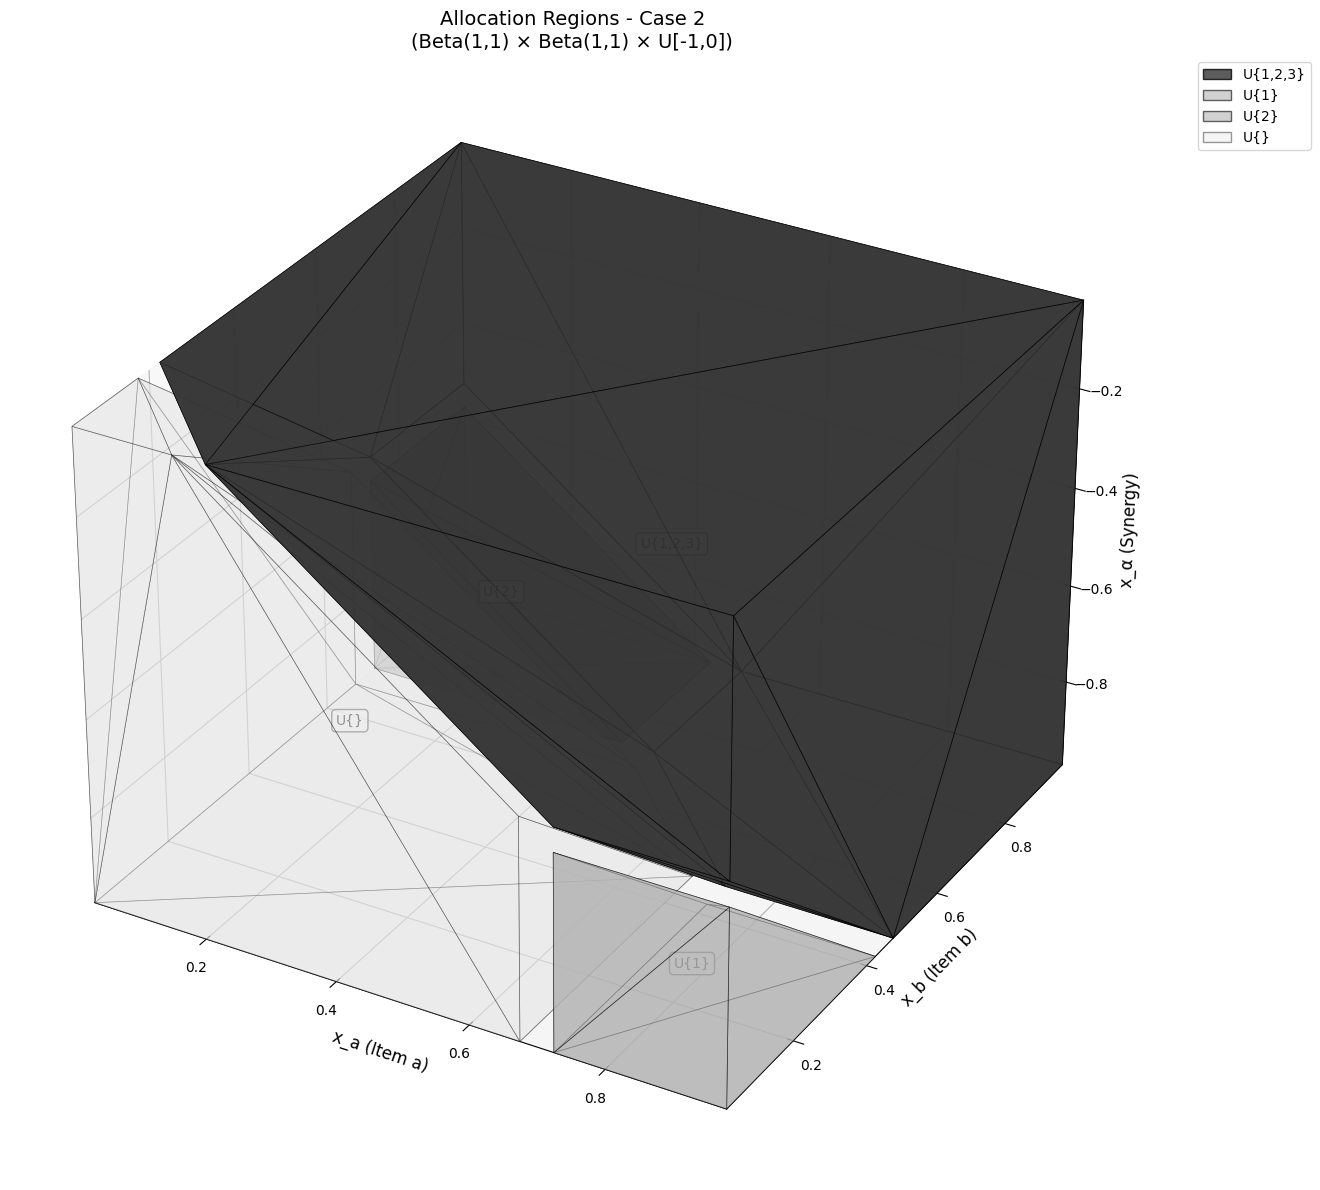

領域の統計:
  U{1,2,3}: 5500 点
  U{1}: 270 点
  U{2}: 270 点
  U{}: 1960 点


In [ ]:
# 保存されたデータから読み込んで可視化
data = load_results("data/results_case2.npz")
plot_polyhedral_regions(
    data['points'], data['p_sol'], data['p_sol'][2, :],
    title="Allocation Regions - Case 2 (from saved data)\n(Beta(1,1) × Beta(1,1) × U[-1,0])"
)


# ケース3

In [10]:
# ケース3: 財a, 財bはBeta(1,1)、シナジーαはU[-1,1]
NX3, NY3, NZ3 = 20, 20, 40
BETA_PARAMS_MIXED = [
    {'type': 'beta', 'params': (1.0, 1.0), 'range': (0, 1)},
    {'type': 'beta', 'params': (1.0, 1.0), 'range': (0, 1)},
    {'type': 'uniform', 'range': (-1, 1)},
]

In [ ]:
points3, weights3 = make_tensor_grid_3d(NX3, NY3, NZ3, BETA_PARAMS_MIXED)
print(f"#types = {len(points3)}")
print("ex. first point, weight =", points3[0], weights3[0])

status3, obj_val3, u_sol3, p_sol3, n_iter3 = solve_mechanism_iterative(
    points3, weights3, grid_sizes=(NX3, NY3, NZ3), solver=SOLVER
)

print("LP status:", status3)
print("Optimal revenue:", obj_val3)
print(f"Number of iterations: {n_iter3}")

# 結果を保存
filepath_case3 = save_results(
    points3, weights3, u_sol3, p_sol3, obj_val3, status3,
    grid_sizes=(NX3, NY3, NZ3),
    n_iter=n_iter3,
    filename="results_case3.npz"
)

#types = 16000
ex. first point, weight = (0.025, 0.025, -0.975) 6.25e-05
Gurobi Optimizer version 13.0.0 build v13.0.0rc1 (mac64[arm] - Darwin 25.1.0 25B78)

CPU model: Apple M2
Thread count: 8 physical cores, 8 logical processors, using up to 8 threads

Academic license 2749041 - for non-commercial use only - registered to ko___@u.northwestern.edu
Optimize a model with 279200 rows, 128000 columns and 773600 nonzeros (Max)
Model has 128000 linear objective coefficients
Coefficient statistics:
  Matrix range     [5e-02, 1e+00]
  Objective range  [2e-06, 1e-04]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+00]
LP warm-start: use basis

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    2.5835190e+00   9.900000e+03   0.000000e+00      0s
   46787    2.0367858e+00   8.763979e+05   0.000000e+00      5s
   51881    2.0211773e+00   2.671062e+07   0.000000e+00     10s
   54965    2.0148843e+00   1.387869e+06   0.000000e+00     15s
   57630    2.009302

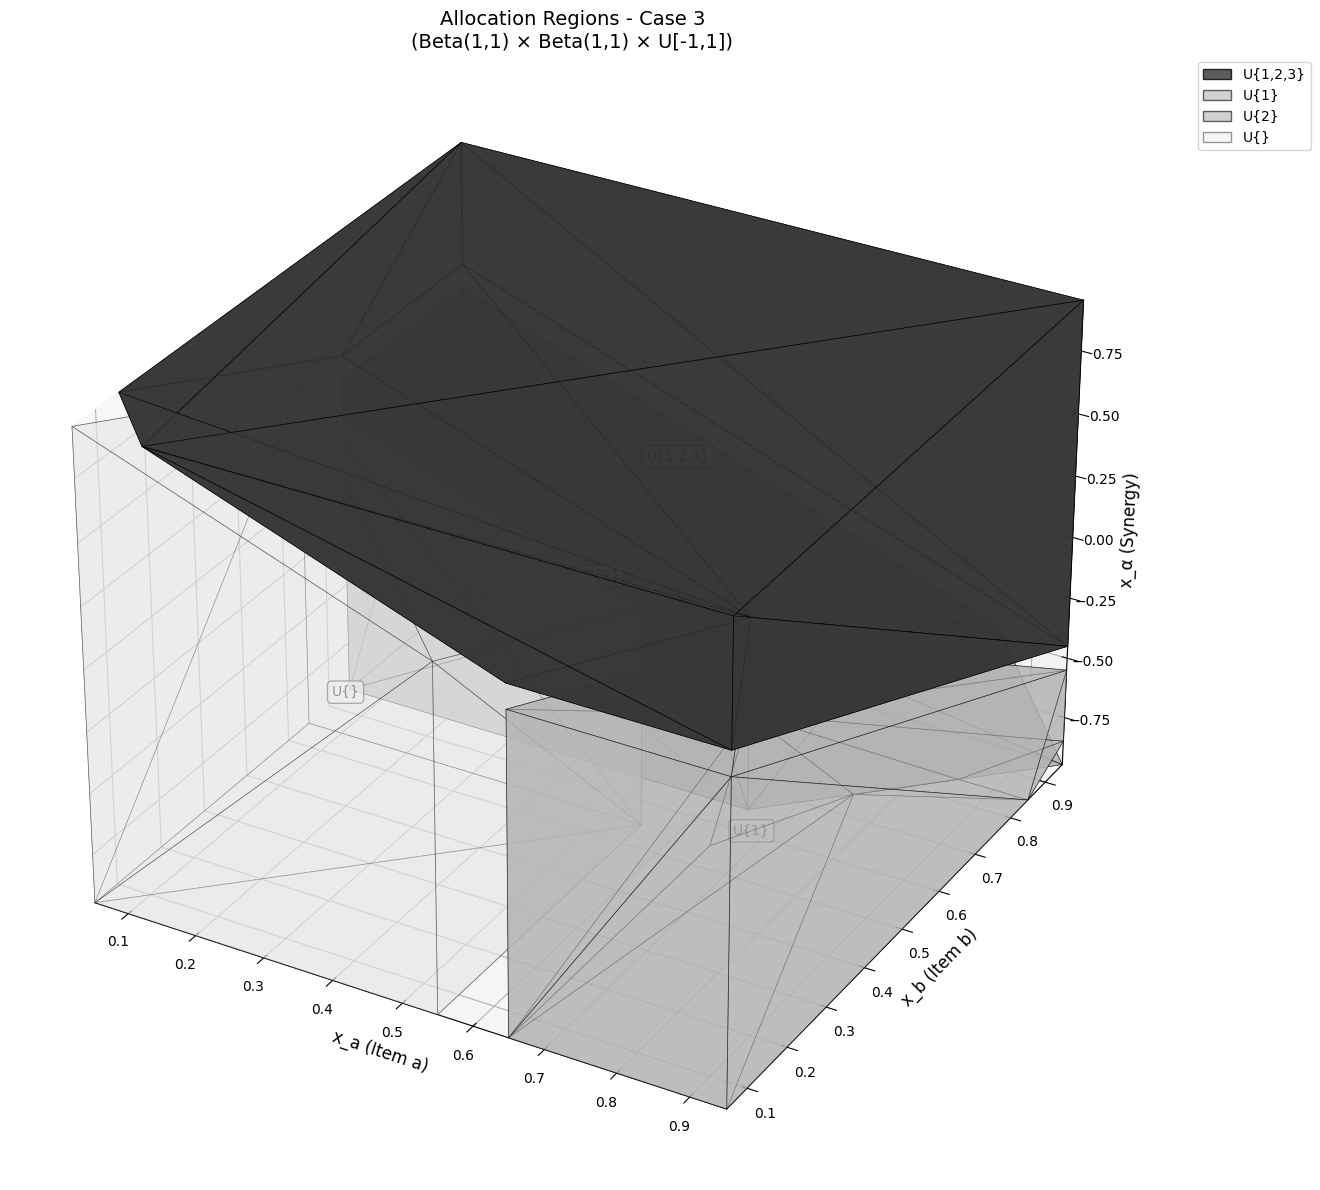

領域の統計:
  U{1,2,3}: 794 点
  U{1}: 338 点
  U{2}: 328 点
  U{}: 540 点


In [ ]:
# 保存されたデータから読み込んで可視化
data = load_results("data/results_case3.npz")
plot_polyhedral_regions(
    data['points'], data['p_sol'], data['p_sol'][2, :],
    title="Allocation Regions - Case 3 (from saved data)\n(Beta(1,1) × Beta(1,1) × U[-1,1])"
)
